# Introducción

In [6]:
# Librerías
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

Leemos los polígonos de los municipios y las unidades económicas mineras  en México

In [7]:
# leer los datos
municipios = gpd.read_file("mun.gpkg")
ue = gpd.read_file("C:\\Heri\\GitHub\\.Semester\\Geospatial-Data-Analysis\\00-Marco-Geoestadistico\\denue_00_21_shp\\conjunto_de_datos\\denue_inegi_21_.shp")

In [8]:
# Asegurar que los datos estén en el mismo sistema de referencias de coordenadas
if ue.crs != municipios.crs:
    ue = ue.to_crs(municipios.crs)
print(ue.crs)

EPSG:6372


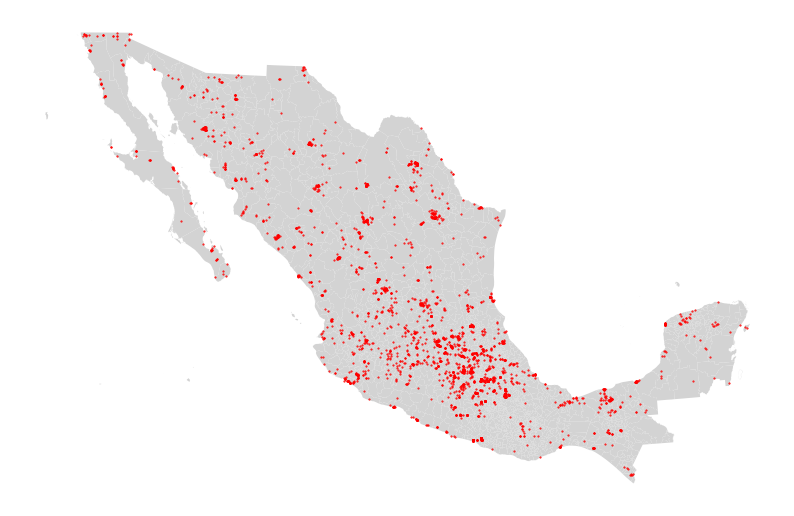

In [9]:
# Visualización exploratoria
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
municipios.plot(ax=ax, color="lightgray", linewidth=0.8)
ue.plot(ax=ax, markersize=1, marker='.', color="red")
ax.set_axis_off()

# Selección de datos

Selección por valores en columna.

Se pueden utilizar diferentes operadores "==", ">=", "<=" "!=", ".isin()", "str.contains()", ".notna()"

In [10]:
# Los datos pueden seleccionarse usando la misma sintaxis que en pandas
guerrero = municipios[municipios["CVE_ENT"]=="12"]

Selección basada en relaciones espaciales.

Geopanda permite seleccionar datos de una capa (un GeoDataframe) respecto a su relación espacial con otra capa (otro GeoDataFrame) mediante el método ".sjoin".


Las relaciones espaciales pueden ser:
* intersects
* within
* contains
* touches
* crosses
* overlaps

Dependiendo de la versión el parámetro de la relación espacial puede ser "op" o "predicate"

Además es posible establer diferentes tipos de consulta:
* left
* inner
* right

Esto se controla con el parámetro "how"

Pueden consultarse ilustraciones de ambos parámetros en https://pygis.io/docs/e_spatial_joins.html

#### Ejemplo: Seleccionar las mínas en el estado de Guerrero

In [ ]:
# Realizar una unión espacial (sjoin)
guerrero_minas = gpd.sjoin(ue, guerrero, how='inner', predicate='within')
# Devuelveme todos los puntos que estén dentro de los polígonos de guerrero

Observe que la unión espacial asigna a cada Unidad Económica en "guerrero_minas" los valores del municipio al que pertenece.

In [12]:
len(guerrero_minas)

283

In [13]:
guerrero_minas.head(3)

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,latitud,longitud,fecha_alta,geometry,index_right,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,POB
1374,6186505,12075212329000181001000000U3,FABRICA DE LADRILLOS SIN NOMBRE,None,212329,Minería de otras arcillas y de otros minerales...,11 a 30 personas,CARRETERA,CHILPANCINGO A IGUALA,OTRO(ESPECIFIQUE),...,17.931478,-99.604223,2014-12,POINT (2753620.942 662333.073),447,12075,12,075,Eduardo Neri,33
1376,6186946,12015327999000012001000000U8,GRUPO ADHERSA INDUSTRIAL,ANTONIO HERNANDEZ MENDEZ SC DE RL DE CV,212311,Minería de piedra caliza,6 a 10 personas,None,NINGUNO,None,...,18.445091,-99.415044,2010-07,POINT (2772622.297 719453.513),388,12015,12,015,Buenavista de Cuéllar,71
1378,6186785,12029212321000042000000000U1,"GRUPO ALARCON, CONCRETOS Y TRITURADOS",ROBERTO ALARCON RIOS SA DE CV,212321,Minería de arena y grava para la construcción,11 a 30 personas,CALLE,CHILPANCINGO-CHICHIHUALCO KM 1,CALLE,...,17.595779,-99.526333,2010-07,POINT (2762506.163 625341.321),421,12029,12,029,Chilpancingo de los Bravo,33


Al usar el método 'inner' se seleccionan únicamente las unidades que están dentro de un municipio de Guerrero.

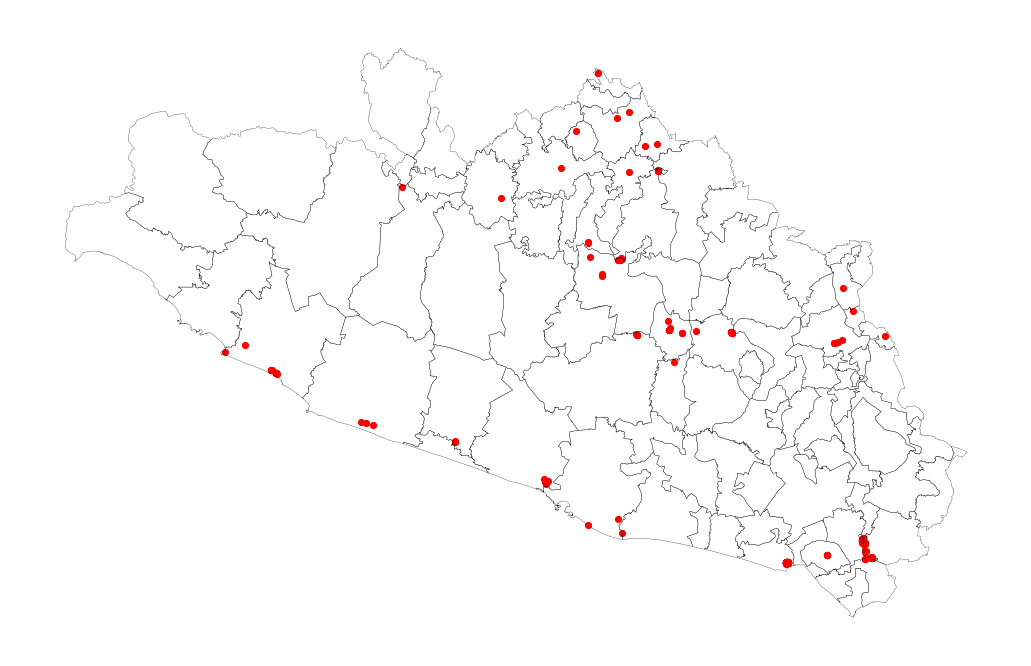

In [14]:
fig, ax = plt.subplots(dpi=200)
guerrero.boundary.plot(ax=ax, linewidth=0.1, color="black")
guerrero_minas.plot(ax=ax, color="red", markersize=10, marker=".")
ax.set_axis_off()

#### Ejemplo: Contar el número de minas en cada municipio de Guerrero

In [15]:
# Realizar una unión espacial (sjoin)
guerrero_municipios = gpd.sjoin(guerrero, ue, how='left', predicate='contains')

Observe que la unión espacial asigna a municipio en "guerrero" los valores de las minas que contiene. Como un municipio puede contenar varias minas, se crea una fila para cada coincidencia.

In [16]:
print("Número de municipios: ", len(guerrero))
print("Número de elementos en la unión espacial: ", len(guerrero_municipios))

Número de municipios:  85
Número de elementos en la unión espacial:  338


In [17]:
guerrero_municipios.head(3)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,POB,geometry,index_right,id,clee,nom_estab,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
376,12080,12,080,Juchitán,89,"POLYGON ((2852523.006 523735.172, 2852662.689 ...",2197.0,9232509.0,12080212311000123000063093M3,PRODUCCION DE CAL,...,La Cuchilla,0108,007,7411291078,None,None,Fijo,16.595879,-98.666009,2020-04
376,12080,12,080,Juchitán,89,"POLYGON ((2852523.006 523735.172, 2852662.689 ...",2186.0,6186615.0,12080212311000011001000000U0,PRODUCCION DE CAL RUSTICA,...,La Cuchilla,0108,007,7411501001,None,None,Fijo,16.595879,-98.666009,2014-12
376,12080,12,080,Juchitán,89,"POLYGON ((2852523.006 523735.172, 2852662.689 ...",2193.0,6186631.0,12080212311000021001000000U9,PRODUCCION DE CAL,...,La Cuchilla,0108,007,7411173832,None,None,Fijo,16.595879,-98.666009,2014-12


Para contar el número de minas por municipio se usa el método ".grouby" heredado de la clase pandas.DataFrame. Este método requiere una columna que sirva como índice o etiqueta de cada municipio, en este caso corresponde a "CVEGEO"

In [ ]:
minas_por_municipio = guerrero_municipios.groupby("CVEGEO").size().reset_index(name="Núm_Minas")
# Hacur un conteo de cuántas minas hay por municipio    
minas_por_municipio

,CVEGEO,Núm_Minas
0,12001,3
1,12002,1
2,12003,1
3,12004,1
4,12005,1
...,...,...
80,12081,1
81,12082,1
82,12083,1
83,12084,1


# Unir datos mediante una clave

Al usar el método ".groupby" se pierde la columna "geometry" y ya no se puede acceder a los datos geoespaciales. Para poder integrar la nueva columna a nuestros datos espaciales originales basta usar el método ".merge" heredado de pandas. Es método requiere indicar una clave que identifique a cada elemento de ambos data frames


In [19]:
guerrero = guerrero.merge(minas_por_municipio,
                          left_on='CVEGEO', right_on='CVEGEO')
guerrero.head(3)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,POB,geometry,Núm_Minas
0,12080,12,080,Juchitán,89,"POLYGON ((2852523.006 523735.172, 2852662.689 ...",6
1,12043,12,043,Metlatónoc,17,"POLYGON ((2874776.448 602301.412, 2874769.146 ...",1
2,12079,12,079,José Joaquín de Herrera,19,"POLYGON ((2820657.759 617598.497, 2820677.426 ...",1


# Mapas temáticos

En Geopandas es muy fácil generar mapas temáticos de colores, basta con usar el método ".plot()" usando el parámetro "column" con la columna que se quiera colorear.

<Axes: >

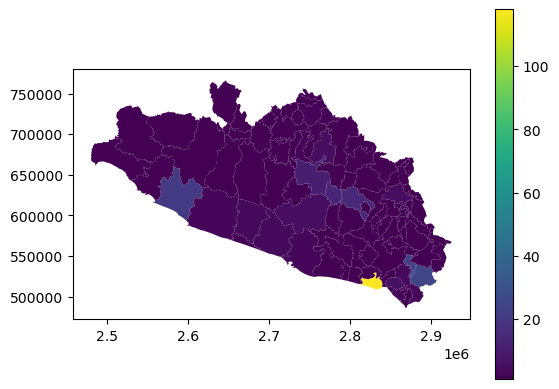

In [20]:
guerrero.plot(column="Núm_Minas", legend=True)

También puede elegirse un mapa de color segmentando los datos en rangos.

En este caso algunos de los parámetros que se pueden ajustar son:
* k: número de clases
* scheme: Tipo de algoritmo de segmentación de datos
* cmap: Paleta de colores.

Esquemas de segmentación:
* quantiles
* equal_interval
* natural_breaks
* fisher_jenks (Intenta minimizar la varianza intraclase y maximizar la varianza entre clases)
* user_defined (requiere definir los intervalos con ' classification_kwds={'bins': limits}')
* std_mean 

c:\Users\herie\.conda\envs\GDA\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(


<Axes: >

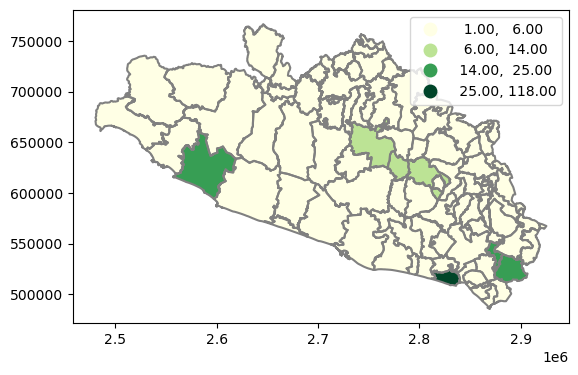

In [21]:
fig, ax = plt.subplots()
guerrero.boundary.plot(ax=ax, color="gray")
guerrero.plot(column="Núm_Minas", legend=True, ax=ax,
              k=4, scheme="fisher_jenks", cmap='YlGn')